In [9]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from helper_functions import *
import pickle

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

### 1. Load Data

In [15]:
ca_df = pd.read_csv('../data/ca_supervised.csv')
ca_df.head()

,date,item_sales,sales_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2012-02-01,13982.413793,970.187987,114.967742,519.391398,-729.649462,1064.382796,383.907527,-24.096774,585.055914,725.169892,-660.369892,76.111828,-403.395161,-1341.916667
1,2012-03-01,14516.741935,534.328142,970.187987,114.967742,519.391398,-729.649462,1064.382796,383.907527,-24.096774,585.055914,725.169892,-660.369892,76.111828,-403.395161
2,2012-04-01,14366.566667,-150.175269,534.328142,970.187987,114.967742,519.391398,-729.649462,1064.382796,383.907527,-24.096774,585.055914,725.169892,-660.369892,76.111828
3,2012-05-01,14277.354839,-89.211828,-150.175269,534.328142,970.187987,114.967742,519.391398,-729.649462,1064.382796,383.907527,-24.096774,585.055914,725.169892,-660.369892
4,2012-06-01,15794.866667,1517.511828,-89.211828,-150.175269,534.328142,970.187987,114.967742,519.391398,-729.649462,1064.382796,383.907527,-24.096774,585.055914,725.169892


### 2. Train Test Split

In [17]:
train, test = train_test_spli(ca_df)
train.shape, test.shape

((40, 13), (12, 13))

### 3. Scale and Split into X & y

In [19]:
X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40, 12), (40,), (12, 12), (12,))

/Users/chelseazaloumis/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


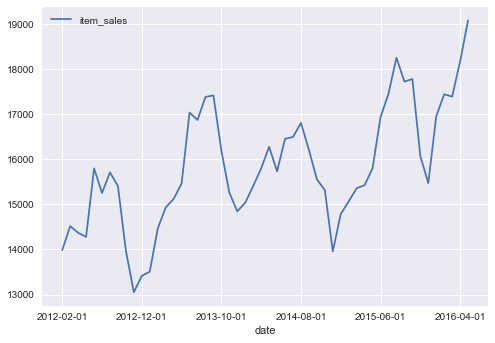

In [24]:
subset = ca_df[['date', 'item_sales']].copy()
subset.set_index('date', inplace=True)
subset.plot();